# An introduction to Finite Difference Methods

In [1]:
## finite_differences.py: Shakthi Visagan

### Adapted from MEDT8007 Simulation Methods in Ultrasound Imaging 2015
### from the slides and class by Alfonso Rodriguez-Molares, Ph.D

import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

## Defining an arbitrary trigonometric function:

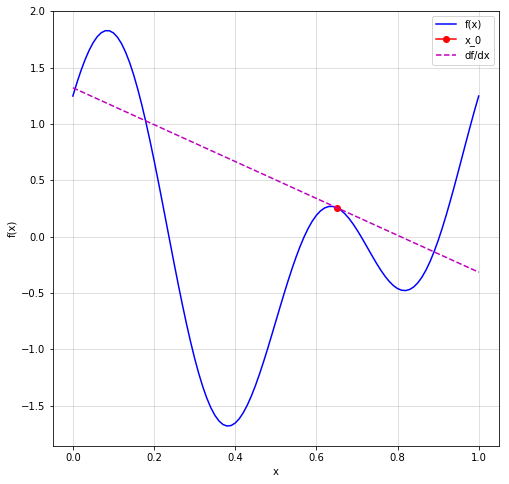

In [2]:
# Similar to MATLAB inline functions,
# we can create a lambda function to take a
# defined set of input values to give us a 
# simple output.

f = lambda x : np.cos(2*np.pi * x) + np.sin((4*np.pi * x) + 0.25)
df = lambda x : -2*np.pi * np.sin(2*np.pi * x) + 4*np.pi * np.cos((4*np.pi * x) + 0.25)
ddf = lambda x : -4*(np.pi ** 2) * np.cos(2*np.pi * x) - 16*(np.pi ** 2) * np.sin((4*np.pi * x) + 0.25)
dddf = lambda x : 8*(np.pi ** 3) * np.sin(2*np.pi * x) - 64*(np.pi ** 3) * np.cos((4*np.pi * x) + 0.25)

# Plotting functions:

x_reference = 0.65
x_axis = np.linspace(start=0, stop=1, num=101)

fig1 = plt.figure(figsize=(8,8))
ax = fig1.add_subplot(111)

ax.plot(x_axis, f(x_axis), c='b', label='f(x)')
ax.plot(x_reference, f(x_reference), c='r', marker='o', label='x_0')
ax.plot(x_axis, df(x_reference)*x_axis + (f(x_reference)-df(x_reference)*x_reference), c='m', linestyle='--', label='df/dx')

ax.grid(which='both', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()

plt.show()

## Approximating derivatives via Finite Difference Methods:

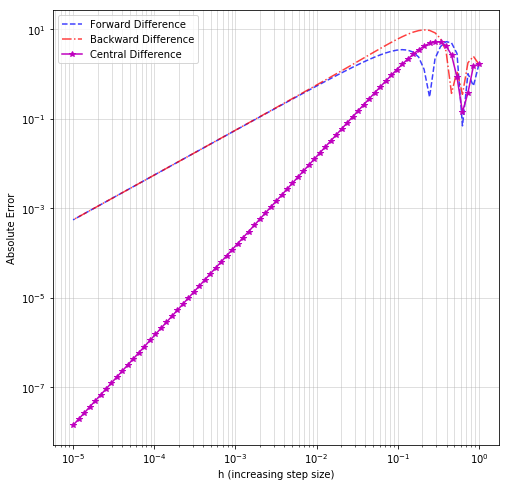

In [3]:
# Analyzing step size values and error:

h = np.logspace(start=0, stop=-5, num=75)

# Defining the finite difference at the reference point:

forward_diff = (f(x_reference + h) - f(x_reference)) / h        # Forward Difference
backward_diff = (f(x_reference) - f(x_reference - h)) / h       # Backward Difference  
central_diff = (f(x_reference + h) - f(x_reference - h)) / (2*h)  # Central Difference

# Calculating the error in each difference method:

error_forward_diff = abs(forward_diff - df(x_reference))
error_backward_diff = abs(backward_diff - df(x_reference))
error_central_diff = abs(central_diff - df(x_reference))

# Plotting the error in each difference method:

fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111)

ax.loglog(h, error_forward_diff, 'b--', label='Forward Difference', alpha=0.75)
ax.loglog(h, error_backward_diff, 'r-.', label='Backward Difference', alpha=0.75)
ax.loglog(h, error_central_diff, 'm-*', label='Central Difference')

ax.grid(which='both', alpha=0.5)
ax.set_xlabel('h (increasing step size)')
ax.set_ylabel('Absolute Error')
ax.legend()

plt.show()

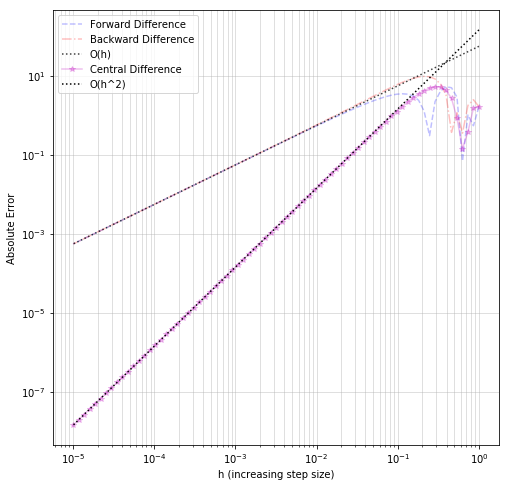

In [4]:
# Plotting the error with approximation orders:

fig3 = plt.figure(figsize=(8,8))
ax = fig3.add_subplot(111)
ax.loglog(h, error_forward_diff, 'b--', label='Forward Difference', alpha=0.25)
ax.loglog(h, error_backward_diff, 'r-.', label='Backward Difference', alpha=0.25)
ax.loglog(h, abs(ddf(x_reference)) * h/2, 'k:', label='O(h)', alpha=0.75)

ax.loglog(h, error_central_diff, 'm-*', label='Central Difference', alpha=0.25)
ax.loglog(h, abs(dddf(x_reference)) * (h ** 2)/6, 'k:', label='O(h^2)', alpha=1)

ax.grid(which='both', alpha=0.5)
ax.set_xlabel('h (increasing step size)')
ax.set_ylabel('Absolute Error')
ax.legend()

plt.show()

## Validating other approximations:

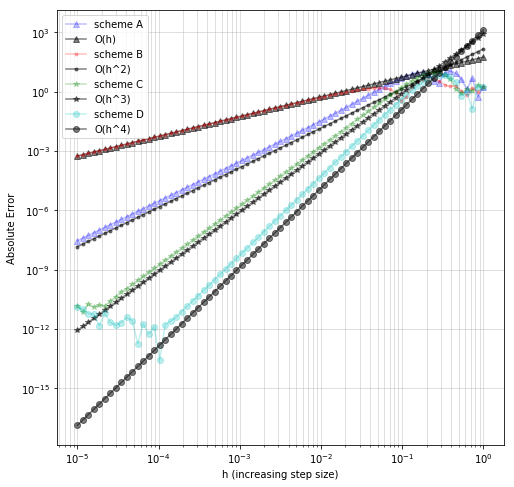

In [5]:
# Figure out the order of approximation for the following 
# finite difference schemes:

scheme_A = (-f(x_reference + 2*h) + 4*f(x_reference + h) - 3*f(x_reference)) / (2*h)
scheme_B = (f(x_reference + 2*h) + f(x_reference + h) - f(x_reference) - f(x_reference - h)) / (4*h)
scheme_C = (2*f(x_reference + h) + 3*f(x_reference) - 6*f(x_reference - h) + f(x_reference - 2*h)) / (6*h)
scheme_D = (-f(x_reference + 2*h) + 8*f(x_reference + h) - 8*f(x_reference - h) + f(x_reference - 2*h)) / (12*h)

# We may need higher order derivatives to get higher order approximations:

ddddf = lambda x : 16*(np.pi ** 4) * np.cos(2*np.pi * x) + 256*(np.pi ** 4) * np.sin((4*np.pi * x) + 0.25)
dddddf = lambda x : -32*(np.pi ** 5) * np.sin(2*np.pi * x) + 1024*(np.pi ** 5) * np.cos((4*np.pi * x) + 0.25)

# Plotting the schemas and order of approximations:

fig4 = plt.figure(figsize=(8,8))
ax = fig4.add_subplot(111)
ax.loglog(h, abs(scheme_A - df(x_reference)), 'b^-', label='scheme A', alpha=0.25)
ax.loglog(h, abs(ddf(x_reference)) * h/2, 'k^-', label='O(h)', alpha=0.5)

ax.loglog(h, abs(scheme_B - df(x_reference)), 'r.-', label='scheme B', alpha=0.25)
ax.loglog(h, abs(dddf(x_reference)) * (h ** 2)/6, 'k.-', label='O(h^2)', alpha=0.5)

ax.loglog(h, abs(scheme_C - df(x_reference)), 'g*-', label='scheme C', alpha=0.25)
ax.loglog(h, abs(ddddf(x_reference)) * (h ** 3)/24, 'k*-', label='O(h^3)', alpha=0.5)

ax.loglog(h, abs(scheme_D - df(x_reference)), 'co-', label='scheme D', alpha=0.25)
ax.loglog(h, abs(dddddf(x_reference)) * (h ** 4)/120, 'ko-', label='O(h^4)', alpha=0.5)

ax.grid(which='both', alpha=0.5)
ax.set_xlabel('h (increasing step size)')
ax.set_ylabel('Absolute Error')
ax.legend()

plt.show()

## Round-off error:

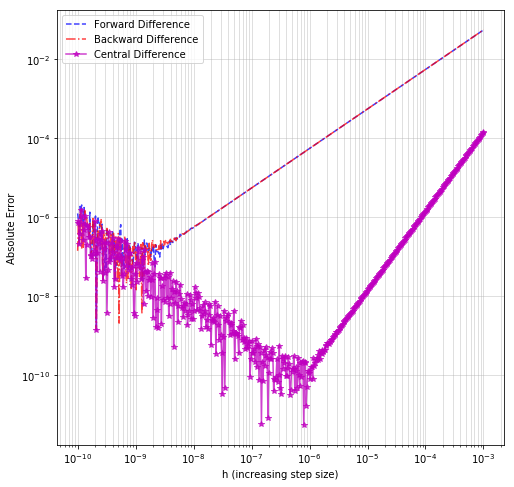

In [6]:
# Increasing the domain of the step size:

h_quant = np.logspace(start=-10, stop=-3, num=500)

# Defining the finite difference at the reference point:

quant_forward_diff = (f(x_reference + h_quant) - f(x_reference)) / h_quant        # Forward Difference
quant_backward_diff = (f(x_reference) - f(x_reference - h_quant)) / h_quant       # Backward Difference  
quant_central_diff = (f(x_reference + h_quant) - f(x_reference - h_quant)) / (2*h_quant)  # Central Difference

# Calculating the error in each difference method:

quant_error_forward_diff = abs(quant_forward_diff - df(x_reference))
quant_error_backward_diff = abs(quant_backward_diff - df(x_reference))
quant_error_central_diff = abs(quant_central_diff - df(x_reference))

# Plotting the error in each difference method:

fig5 = plt.figure(figsize=(8,8))
ax = fig5.add_subplot(111)

ax.loglog(h_quant, quant_error_forward_diff, 'b--', label='Forward Difference', alpha=0.75)
ax.loglog(h_quant, quant_error_backward_diff, 'r-.', label='Backward Difference', alpha=0.75)
ax.loglog(h_quant, quant_error_central_diff, 'm-*', label='Central Difference', alpha=0.75)

ax.grid(which='both', alpha=0.5)
ax.set_xlabel('h (increasing step size)')
ax.set_ylabel('Absolute Error')
ax.legend()

plt.show()

## What is the quantization or round-off error of our machine?

In [7]:
print(7./3 - 4./3 - 1) 
# 2.220446049250313e-16

print(np.finfo(float).eps)
# 2.220446049250313e-16

print(np.finfo(np.float32).eps)
# 1.1920929e-07

# np.spacing(x) returns the distance between the input and
# the nearest adjacent number. This is similar to the MATLAB
# function eps().

print(np.spacing(5))
# 8.881784197001252e-16

2.220446049250313e-16
2.220446049250313e-16
1.1920929e-07
8.881784197001252e-16


## Visualizing the quantization error of our machine:

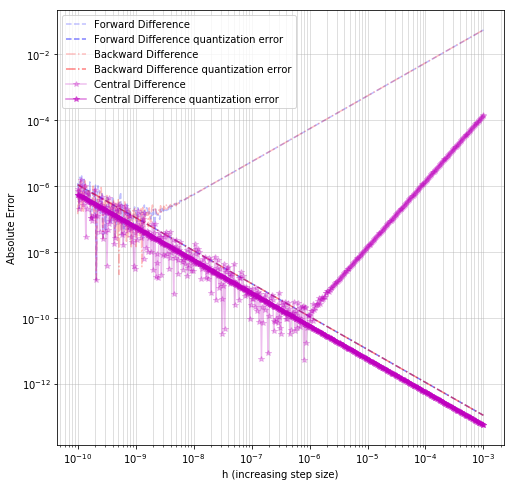

In [8]:
# Defining the finite difference errors at the reference point using np.spacing(x):

# When adding or subtracting quantities, you simply add the errors
# with no other modification.
# This means that we just add the np.spacing(x) of the quantities we're adding
# or subtracting
# It is important to keep in mind that when you multiply or    
# divide two quantities, their relative errors are added.

# Forward Difference error
numerator_relative_error_fd = (np.spacing(f(x_reference + h_quant)) + np.spacing(f(x_reference))) / abs(f(x_reference + h_quant) - f(x_reference))
denominator_relative_error = np.spacing(h_quant) / h_quant # We can define the same denominator error for all three schemes
visu_quant_error_fd = abs(quant_forward_diff) * (numerator_relative_error_fd + denominator_relative_error)

# Backward Difference error
numerator_relative_error_bd = (np.spacing(f(x_reference)) + np.spacing(f(x_reference - h_quant))) / abs(f(x_reference) - f(x_reference - h_quant))
visu_quant_error_bd = abs(quant_backward_diff) * (numerator_relative_error_bd + denominator_relative_error)

# Forward Difference error
numerator_relative_error_cd = (np.spacing(f(x_reference + h_quant)) + np.spacing(f(x_reference - h_quant))) / abs(f(x_reference + h_quant) - f(x_reference - h_quant))
visu_quant_error_cd = abs(quant_central_diff) * (numerator_relative_error_cd + denominator_relative_error)

# Plotting quantization error

fig6 = plt.figure(figsize=(8,8))
ax = fig6.add_subplot(111)

ax.loglog(h_quant, quant_error_forward_diff, 'b--', label='Forward Difference', alpha=0.25)
ax.loglog(h_quant, visu_quant_error_fd, 'b--', label='Forward Difference quantization error', alpha=0.5)

ax.loglog(h_quant, quant_error_backward_diff, 'r-.', label='Backward Difference', alpha=0.25)
ax.loglog(h_quant, visu_quant_error_bd, 'r-.', label='Backward Difference quantization error', alpha=0.5)

ax.loglog(h_quant, quant_error_central_diff, 'm-*', label='Central Difference', alpha=0.25)
ax.loglog(h_quant, visu_quant_error_cd, 'm-*', label='Central Difference quantization error', alpha=0.5)

ax.grid(which='both', alpha=0.5)
ax.set_xlabel('h (increasing step size)')
ax.set_ylabel('Absolute Error')
ax.legend()

plt.show()

## Approximating second-order derivatives with finite differences:

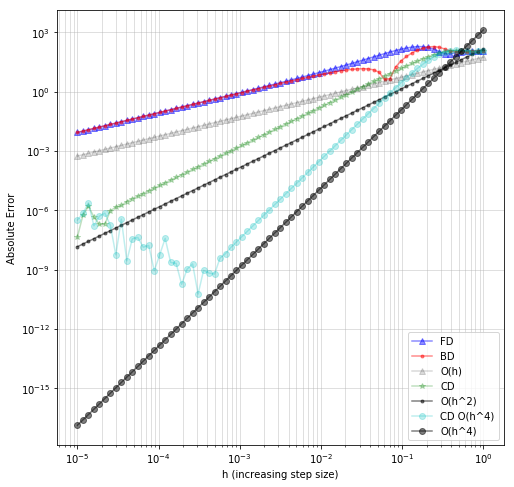

In [9]:
# Defining the finite difference approximations for 
# second-order derivatives:

FDxx = (f(x_reference + 2*h) - 2*f(x_reference + h) + f(x_reference)) / (h**2) # O(h)
BDxx = (f(x_reference) - 2*f(x_reference - h) + f(x_reference - 2*h)) / (h**2) # O(h)
CDxx = (f(x_reference + h) - 2*f(x_reference) + f(x_reference - h)) / (h**2) # O(h^2)
CDxxO4 = (-f(x_reference + 2*h) + 16*f(x_reference + h) - 30*f(x_reference) + 16*f(x_reference-h) - f(x_reference - 2*h)) / (12*(h**2)) # O(h^4)

# Plotting the error:

fig7 = plt.figure(figsize=(8,8))
ax = fig7.add_subplot(111)

ax.loglog(h, abs(FDxx - ddf(x_reference)), 'b^-', label='FD', alpha=0.45)
ax.loglog(h, abs(BDxx - ddf(x_reference)), 'r.-', label='BD', alpha=0.45)
ax.loglog(h, abs(ddf(x_reference)) * h/2, 'k^-', label='O(h)', alpha=0.15)

ax.loglog(h, abs(CDxx - ddf(x_reference)), 'g*-', label='CD', alpha=0.25)
ax.loglog(h, abs(dddf(x_reference)) * (h ** 2)/6, 'k.-', label='O(h^2)', alpha=0.5)

ax.loglog(h, abs(CDxxO4 - ddf(x_reference)), 'co-', label='CD O(h^4)', alpha=0.25)
ax.loglog(h, abs(dddddf(x_reference)) * (h ** 4)/120, 'ko-', label='O(h^4)', alpha=0.5)

ax.grid(which='both', alpha=0.5)
ax.set_xlabel('h (increasing step size)')
ax.set_ylabel('Absolute Error')
ax.legend()

plt.show()